(256, 256)


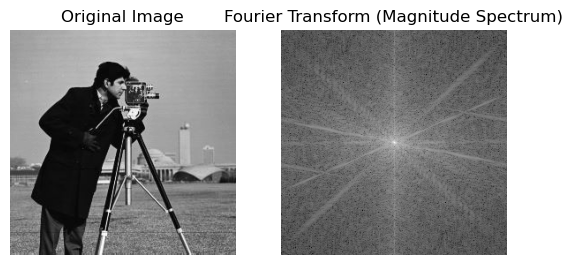

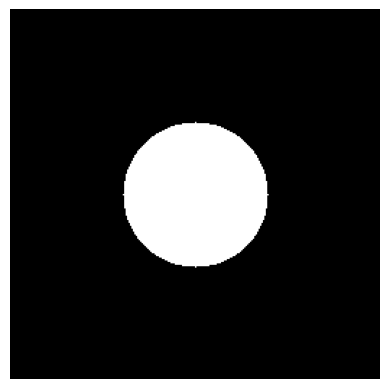

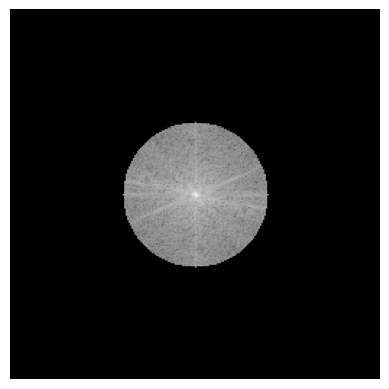

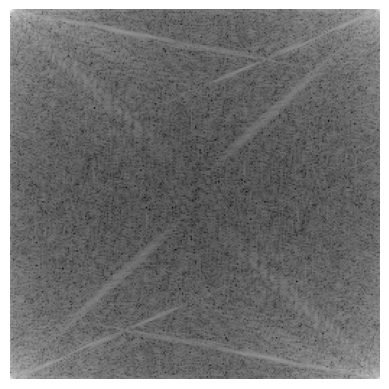

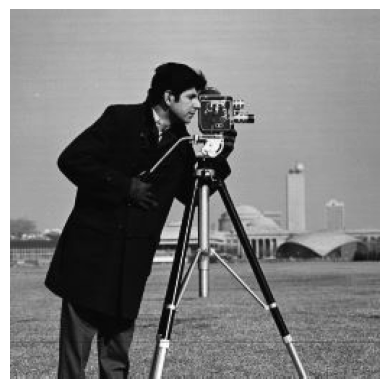

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft2, fftshift

img=cv2.imread('cameraman.jpg',0)
print(img.shape)

# Compute the 2D Fourier transform of the image
g = fft2(img)
g_shift = fftshift(g)
magnitude_spectrum = np.log(np.abs(g_shift) + 1)

# Plot the original image and its Fourier transform
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Fourier Transform (Magnitude Spectrum)")
plt.imshow(magnitude_spectrum, cmap='gray')
plt.axis('off')
plt.show()

# Filter: Low pass filter
M,N = img.shape
H = np.zeros((M,N), dtype=np.float32)
D0 = 50
for u in range(M):
    for v in range(N):
        D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
        if D <= D0:
            H[u,v] = 1
        else:
            H[u,v] = 0

plt.imshow(H, cmap='gray')
plt.axis('off')
plt.show()

# Ideal Low Pass Filtering
Gshift = g_shift * H
plt.imshow(np.log1p(np.abs(Gshift)),
           cmap='gray')
plt.axis('off')
plt.show()

# Inverse Fourier Transform
G = np.fft.ifftshift(g_shift)
plt.imshow(np.log1p(np.abs(G)), cmap='gray')
plt.axis('off')
plt.show()

g = np.abs(np.fft.ifft2(G))
plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()

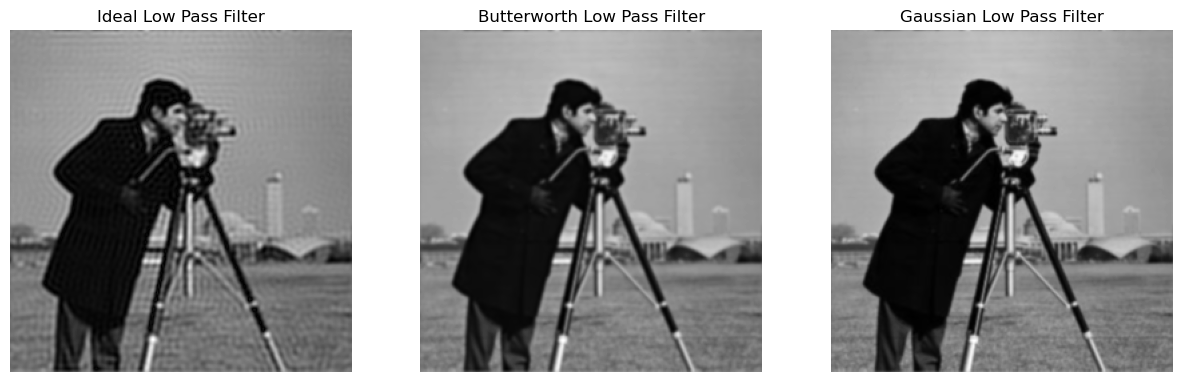

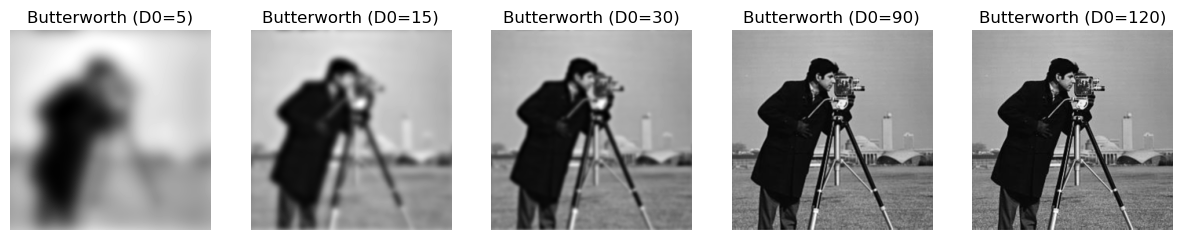

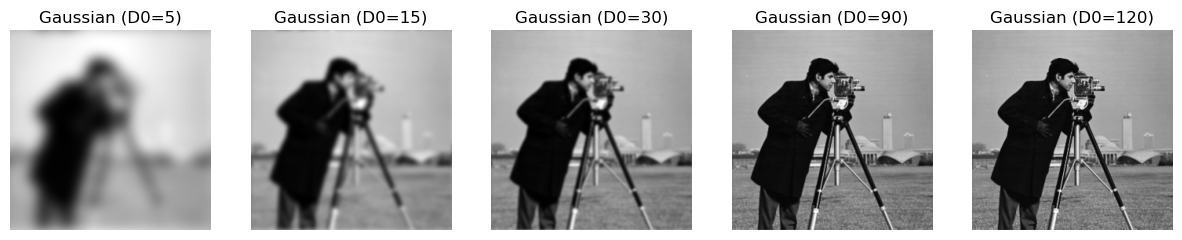

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2, ifft2, fftshift
from skimage import io, color

def ideal_low_pass_filter(M, N, D0):
    H = np.zeros((M, N), dtype=np.float32)
    for u in range(M):
        for v in range(N):
            D = np.sqrt((u - M / 2) ** 2 + (v - N / 2) ** 2)
            if D <= D0:
                H[u, v] = 1
    return H

def butterworth_low_pass_filter(M, N, D0, n):
    H = np.zeros((M, N), dtype=np.float32)
    for u in range(M):
        for v in range(N):
            D = np.sqrt((u - M / 2) ** 2 + (v - N / 2) ** 2)
            H[u, v] = 1 / (1 + (D / D0) ** (2 * n))
    return H

def gaussian_low_pass_filter(M, N, D0):
    H = np.zeros((M, N), dtype=np.float32)
    for u in range(M):
        for v in range(N):
            D = np.sqrt((u - M / 2) ** 2 + (v - N / 2) ** 2)
            H[u, v] = np.exp(-D ** 2 / (2 * (D0 ** 2)))
    return H

def apply_filter(img, H):
    G = fft2(img)
    Gshift = fftshift(G) * H
    img_filtered = np.abs(ifft2(Gshift))
    return img_filtered

# Load and preprocess the image
img = io.imread('cameraman.jpg')  # Replace with your image path
if img.ndim == 3:
    img = color.rgb2gray(img)  # Convert to grayscale
img = img.astype(np.float32)

M, N = img.shape
D0 = 50  # Cutoff frequency for comparison
n_values = [2]  # Butterworth order
cutoff_frequencies = [5, 15, 30, 90, 120]

# Filter comparisons
filters = {
    'Ideal': ideal_low_pass_filter(M, N, D0),
    'Butterworth': butterworth_low_pass_filter(M, N, D0, n_values[0]),
    'Gaussian': gaussian_low_pass_filter(M, N, D0)
}

# Display the filtered images
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for ax, (title, H) in zip(axs, filters.items()):
    img_filtered = apply_filter(img, H)
    ax.imshow(img_filtered, cmap='gray')
    ax.set_title(f'{title} Low Pass Filter')
    ax.axis('off')
plt.show()

# Butterworth filter comparison for different cutoff frequencies
fig, axs = plt.subplots(1, len(cutoff_frequencies), figsize=(15, 5))
for ax, D0 in zip(axs, cutoff_frequencies):
    H = butterworth_low_pass_filter(M, N, D0, n_values[0])
    img_filtered = apply_filter(img, H)
    ax.imshow(img_filtered, cmap='gray')
    ax.set_title(f'Butterworth (D0={D0})')
    ax.axis('off')
plt.show()

# Gaussian filter comparison for different cutoff frequencies
fig, axs = plt.subplots(1, len(cutoff_frequencies), figsize=(15, 5))
for ax, D0 in zip(axs, cutoff_frequencies):
    H = gaussian_low_pass_filter(M, N, D0)
    img_filtered = apply_filter(img, H)
    ax.imshow(img_filtered, cmap='gray')
    ax.set_title(f'Gaussian (D0={D0})')
    ax.axis('off')
plt.show()


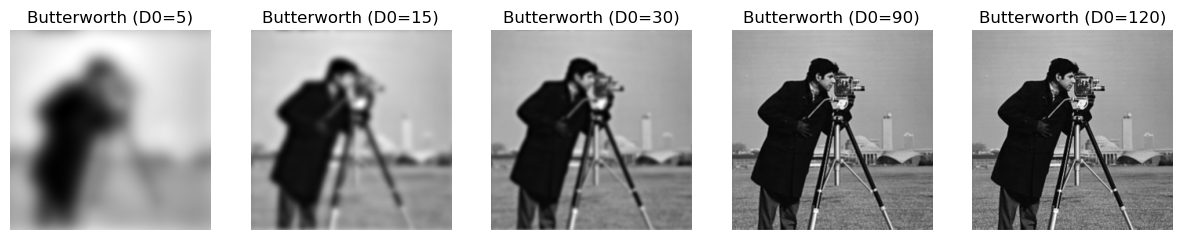

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft2, fftshift

def butterworth_low_pass_filter(M, N, D0, n):
    H = np.zeros((M, N), dtype=np.float32)
    for u in range(M):
        for v in range(N):
            D = np.sqrt((u - M / 2) ** 2 + (v - N / 2) ** 2)
            H[u, v] = 1 / (1 + (D / D0) ** (2 * n))
    return H

def apply_filter(img, H):
    G = fft2(img)
    Gshift = fftshift(G) * H
    img_filtered = np.abs(np.fft.ifft2(Gshift))
    return img_filtered

img = cv2.imread('cameraman.jpg', cv2.IMREAD_GRAYSCALE)  
img = img.astype(np.float32)

M, N = img.shape
cutoff_frequencies = [5, 15, 30, 90, 120]

fig, axs = plt.subplots(1, len(cutoff_frequencies), figsize=(15, 5))

for ax, D0 in zip(axs, cutoff_frequencies):
    H = butterworth_low_pass_filter(M, N, D0, 2)
    img_filtered = apply_filter(img, H)
    ax.imshow(img_filtered, cmap='gray')
    ax.set_title(f'Butterworth (D0={D0})')
    ax.axis('off')
plt.show()


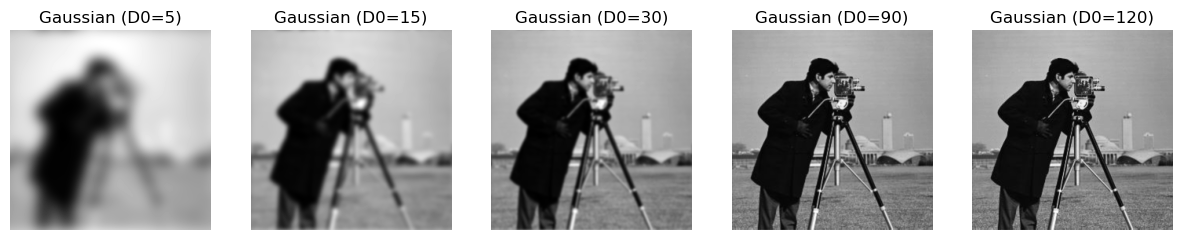

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft2, fftshift

def gaussian_low_pass_filter(M, N, D0):
    H = np.zeros((M, N), dtype=np.float32)
    for u in range(M):
        for v in range(N):
            D = np.sqrt((u - M / 2) ** 2 + (v - N / 2) ** 2)
            H[u, v] = np.exp(-D ** 2 / (2 * (D0 ** 2)))
    return H

def apply_filter(img, H):
    G = fft2(img)
    Gshift = fftshift(G) * H
    img_filtered = np.abs(np.fft.ifft2(Gshift))
    return img_filtered

img = cv2.imread('cameraman.jpg', cv2.IMREAD_GRAYSCALE)  
img = img.astype(np.float32)

M, N = img.shape
cutoff_frequencies = [5, 15, 30, 90, 120]

fig, axs = plt.subplots(1, len(cutoff_frequencies), figsize=(15, 5))

for ax, D0 in zip(axs, cutoff_frequencies):
    H = gaussian_low_pass_filter(M, N, D0)
    img_filtered = apply_filter(img, H)
    ax.imshow(img_filtered, cmap='gray')
    ax.set_title(f'Gaussian (D0={D0})')
    ax.axis('off')
plt.show()


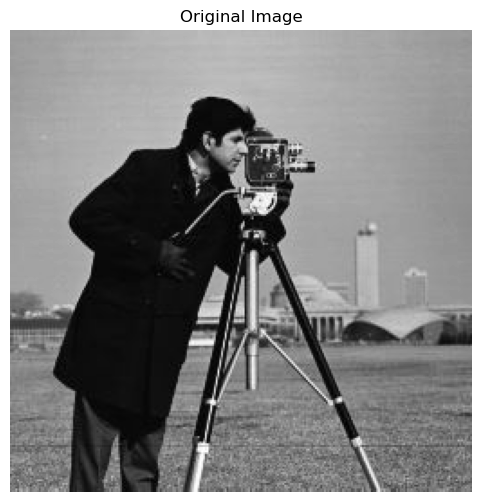

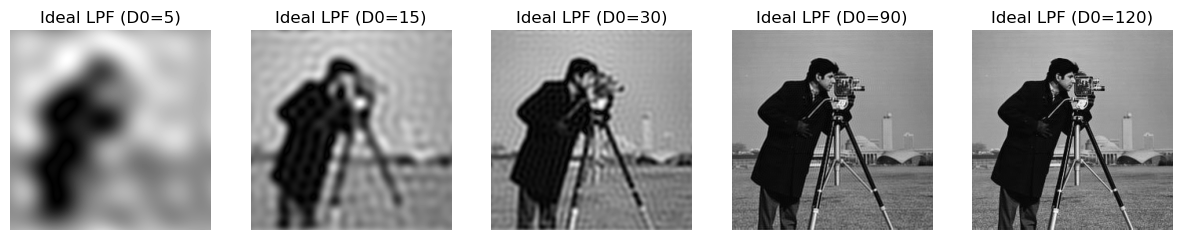

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft2, fftshift

# Load and preprocess the image
img = cv2.imread('cameraman.jpg', cv2.IMREAD_GRAYSCALE)  # Replace with your image path
img = img.astype(np.float32)

M, N = img.shape

# Display the original image
plt.figure(figsize=(6, 6))
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

# Ideal Low Pass Filter for different cutoff frequencies
cutoff_frequencies = [5, 15, 30, 90, 120]

# Create a figure to display the results
fig, axs = plt.subplots(1, len(cutoff_frequencies), figsize=(15, 5))

for i, D0 in enumerate(cutoff_frequencies):
    # Create the filter
    H = np.zeros((M, N), dtype=np.float32)
    for u in range(M):
        for v in range(N):
            D = np.sqrt((u - M / 2) ** 2 + (v - N / 2) ** 2)
            if D <= D0:
                H[u, v] = 1
            else:
                H[u, v] = 0

    # Apply Ideal Low Pass Filtering
    G = fft2(img)
    Gshift = fftshift(G) * H
    img_filtered = np.abs(np.fft.ifft2(Gshift))

    # Display the filtered image
    axs[i].imshow(img_filtered, cmap='gray')
    axs[i].set_title(f'Ideal LPF (D0={D0})')
    axs[i].axis('off')

plt.show()


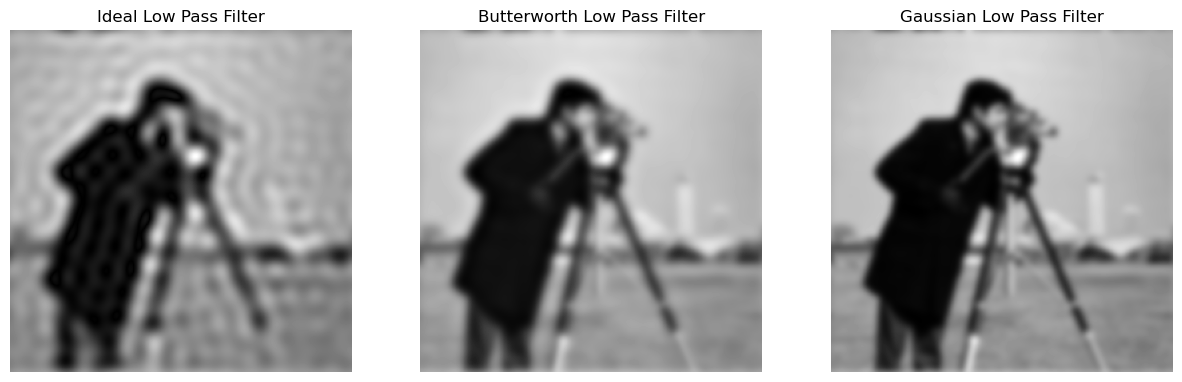

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft2, fftshift

def ideal_low_pass_filter(M, N, D0):
    H = np.zeros((M, N), dtype=np.float32)
    for u in range(M):
        for v in range(N):
            D = np.sqrt((u - M / 2) ** 2 + (v - N / 2) ** 2)
            if D <= D0:
                H[u, v] = 1
    return H

def butterworth_low_pass_filter(M, N, D0, n):
    H = np.zeros((M, N), dtype=np.float32)
    for u in range(M):
        for v in range(N):
            D = np.sqrt((u - M / 2) ** 2 + (v - N / 2) ** 2)
            H[u, v] = 1 / (1 + (D / D0) ** (2 * n))
    return H

def gaussian_low_pass_filter(M, N, D0):
    H = np.zeros((M, N), dtype=np.float32)
    for u in range(M):
        for v in range(N):
            D = np.sqrt((u - M / 2) ** 2 + (v - N / 2) ** 2)
            H[u, v] = np.exp(-D ** 2 / (2 * (D0 ** 2)))
    return H

def apply_filter(img, H):
    G = fft2(img)
    Gshift = fftshift(G) * H
    img_filtered = np.abs(np.fft.ifft2(Gshift))
    return img_filtered

img = cv2.imread('cameraman.jpg', cv2.IMREAD_GRAYSCALE) 
img = img.astype(np.float32)

M, N = img.shape
D0 = 15

filters = {
    'Ideal': ideal_low_pass_filter(M, N, D0),
    'Butterworth': butterworth_low_pass_filter(M, N, D0, 2),
    'Gaussian': gaussian_low_pass_filter(M, N, D0)
}

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for ax, (title, H) in zip(axs, filters.items()):
    img_filtered = apply_filter(img, H)
    ax.imshow(img_filtered, cmap='gray')
    ax.set_title(f'{title} Low Pass Filter')
    ax.axis('off')
plt.show()


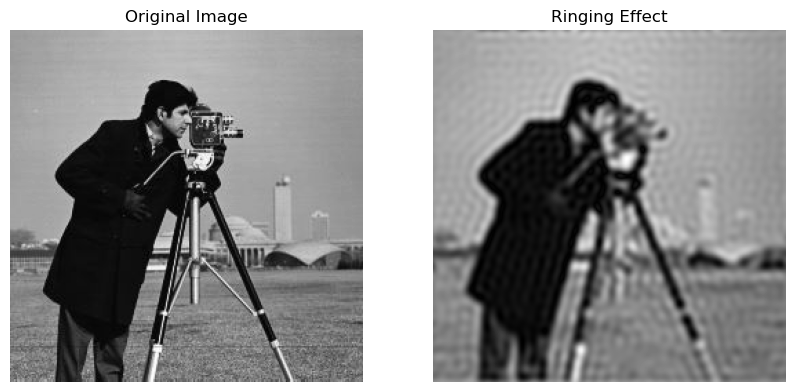

In [9]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def ideal_low_pass_filter(shape, cutoff):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    x = np.arange(0, cols) - ccol
    y = np.arange(0, rows) - crow
    return np.sqrt(x[:, None]**2 + y**2) <= cutoff

def apply_filter(image, cutoff):
    dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)
    mask = ideal_low_pass_filter(image.shape, cutoff)[:, :, np.newaxis]
    img_back = cv2.idft(np.fft.ifftshift(dft_shift * mask))
    return cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])

image = cv2.imread('cameraman.jpg', cv2.IMREAD_GRAYSCALE)
filtered_image = apply_filter(image, cutoff=30)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Ringing Effect')
plt.imshow(filtered_image, cmap='gray')
plt.axis('off')

plt.show()


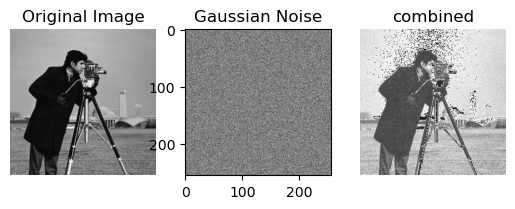

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as pli

img=cv2.imread('cameraman.jpg',0)
M,N = img.shape

gauss_noise=np.zeros((M,N),dtype=np.uint8)
cv2.randn(gauss_noise,128,20)
gauss_noise=(gauss_noise*0.5).astype(np.uint8)

combined=img+gauss_noise

plt.subplot(1,3,1)
plt.imshow(img,cmap='gray')
plt.title('Original Image')
plt.axis("off")
plt.subplot(1,3,2)
plt.imshow(gauss_noise,cmap='gray')
plt.title('Gaussian Noise')
plt.subplot(1,3,3)
plt.imshow(combined,cmap='gray')
plt.title('combined')
plt.axis("off")
plt.show() 

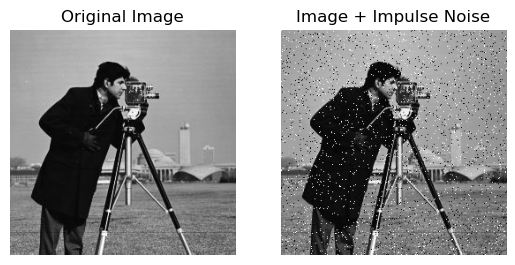

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('cameraman.jpg', 0)
M, N = img.shape

impulse_noise = img.copy()
num_impulses = int(0.05 * M * N)  
for _ in range(num_impulses):
    x = np.random.randint(0, M)
    y = np.random.randint(0, N)
    impulse_noise[x, y] = 255 if np.random.rand() > 0.5 else 0  

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis("off")



plt.subplot(1, 2, 2)
plt.imshow(impulse_noise, cmap='gray')
plt.title('Image + Impulse Noise')
plt.axis("off")

plt.show()


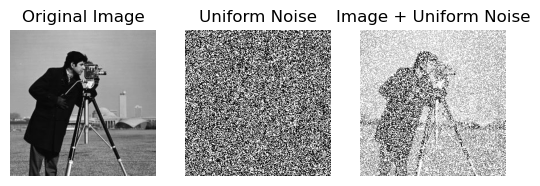

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
img = cv2.imread('cameraman.jpg', 0)
M, N = img.shape

# Generate Uniform noise
uni_noise = np.random.uniform(-20, 20, (M, N)).astype(np.uint8)
combined_uniform = cv2.add(img, uniform_noise)

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(uni_noise, cmap='gray')
plt.title('Uniform Noise')
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(combined_uniform, cmap='gray')
plt.title('Image + Uniform Noise')
plt.axis("off")

plt.show()


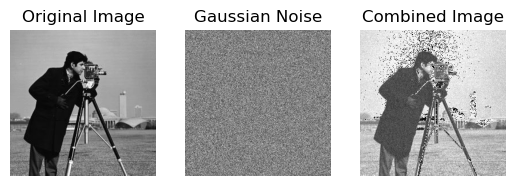

In [44]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
img = cv2.imread('cameraman.jpg', 0)
M, N = img.shape

# Generate Gaussian noise
gauss_noise = np.zeros((M, N), dtype=np.uint8)
cv2.randn(gauss_noise, 128, 20)
gauss_noise = (gauss_noise * 0.5).astype(np.uint8)

# Combine the original image with noise
combined = img + gauss_noise

# Save the combined image using OpenCV
cv2.imwrite('combined_gaussian_noise.png', combined)

# Display the images
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(gauss_noise, cmap='gray')
plt.title('Gaussian Noise')
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(combined, cmap='gray')
plt.title('Combined Image')
plt.axis("off")

plt.show()
